In [1]:
import os
from dotenv import load_dotenv
import pandas as pd

load_dotenv()

True

In [2]:
df = pd.read_csv("./data/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# 1. Use GenAI to understand schema of data, identify columns and numeric data types (Can explore infer schema functionality)
# 2. Use this schema as prompt context and generate visualization code

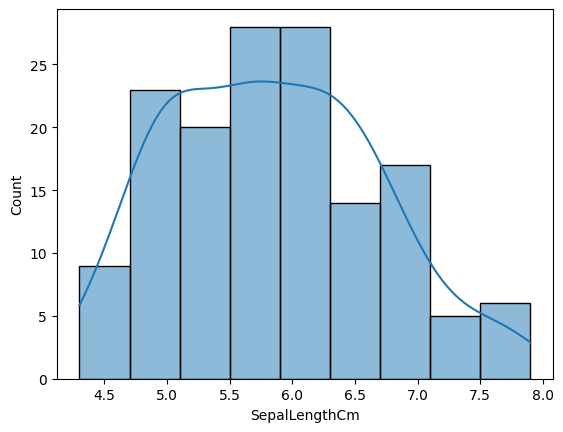

In [17]:
import os
from dotenv import load_dotenv
import pandas as pd
load_dotenv()


from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser


def __df_metadata(df):
    """Generate schema for pandas dataframe."""
    schema = {}
    for i in zip(df.columns, df.dtypes):
        schema[i[0]] = str(i[1])
    return str(schema)


def generate_seaborn_code(df, user_prompt):
    """Generate seaborn code using LLMs."""
    schema = __df_metadata(df)
    
    # Define LLM and prompt
    llm = ChatOpenAI(temperature=0)
    prompt = ChatPromptTemplate.from_messages([
        ("system", "You are world class python programmer and expert in using Seaborn libraries."),
        ("user", """Assume you have a data frame `df` with the following schema: {schema}. {input}. Dont create your own data, only give code as the output""")
    ])
    output_parser = StrOutputParser()
    chain = prompt | llm | output_parser
    result = chain.invoke({"schema": schema, "input": user_prompt})
    parsed_code = result.replace("```python", "").replace("```", "")

    return parsed_code


def run_generated_code(parsed_code):
    """Execure generated code."""
    # TODO: Validate code and add guardrails
    exec(parsed_code)


def generate_visualization(df, user_prompt):
    """Generate chart using user's data frame and prompt."""
    parsed_code = generate_seaborn_code(df, user_prompt)
    run_generated_code(parsed_code)

if __name__ == '__main__':
    df = pd.read_csv("./data/Iris.csv")
    uer_input_prompt = "write a python code using seaborn to show the distribution of SepalLengthCm"
    generate_visualization(df=df, user_prompt=uer_input_prompt)

In [71]:
# from langchain_openai import ChatOpenAI
# from langchain_core.prompts import ChatPromptTemplate
# from langchain_core.output_parsers import StrOutputParser

# llm = ChatOpenAI(temperature=0)
# prompt = ChatPromptTemplate.from_messages([
#     ("system", "You are world class python programmer and expert in using Seaborn libraries."),
#     ("user", "{input}")
# ])
# output_parser = StrOutputParser()

# chain = prompt | llm | output_parser

# result = chain.invoke({"input": """ Assume you have a data frame `df` with the below schema, write a python code using seaborn to show the distribution of SepalLengthCm
# ```
# Id                 int64
# SepalLengthCm    float64
# SepalWidthCm     float64
# PetalLengthCm    float64
# PetalWidthCm     float64
# Species           object
# ```
# Dont create your own data, only give code as the output"""})

# parsed_code = result.replace("```python", "").replace("```", "")

# print(parsed_code)
# exec(parsed_code)